# 3D Reconstruction
## 3D sinogram from 3D phantom
First, we generate a 3D Shepp-Logan phantom, that we turn into a phantom for the class Sinogram to be able to process it. The latter stacks all the slices into a list and computes their 2-D sinograms.

<IPython.core.display.Javascript object>


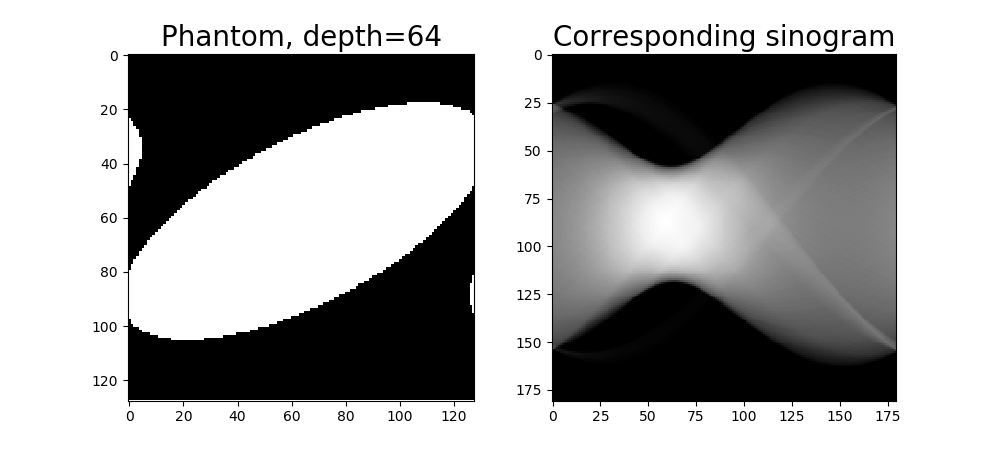

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../design/')
from image import Image
from phantom import Phantom
from phantom_array import Phantom_array
from phantom_array_3d import Phantom3D_array
from sinogram import Sinogram
from sinogram_3d import Sinogram3D
from SheppLogan3D import phantom3d, modified_shepp_logan

depthxy = 64
depthxz = 64
depthyz = 64

p = phantom3d()
pht = Phantom3D_array(p)
sng3d = Sinogram3D(pht)
thetas = np.arange(180)
sng3d.compute(thetas)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4.5))
Image.plot(pht.img[depthxy], ax1, title = "Phantom, depth=" + str(depthxy))
Image.plot(sng3d.sngs[depthxy].sng, ax2, title = "Corresponding sinogram")

## Flitered Backprojection
We plot the reconstructed 3-D image from 3 points of view, with a variable depth. Sliders are then used to visualize the ellipsoids.

<IPython.core.display.Javascript object>


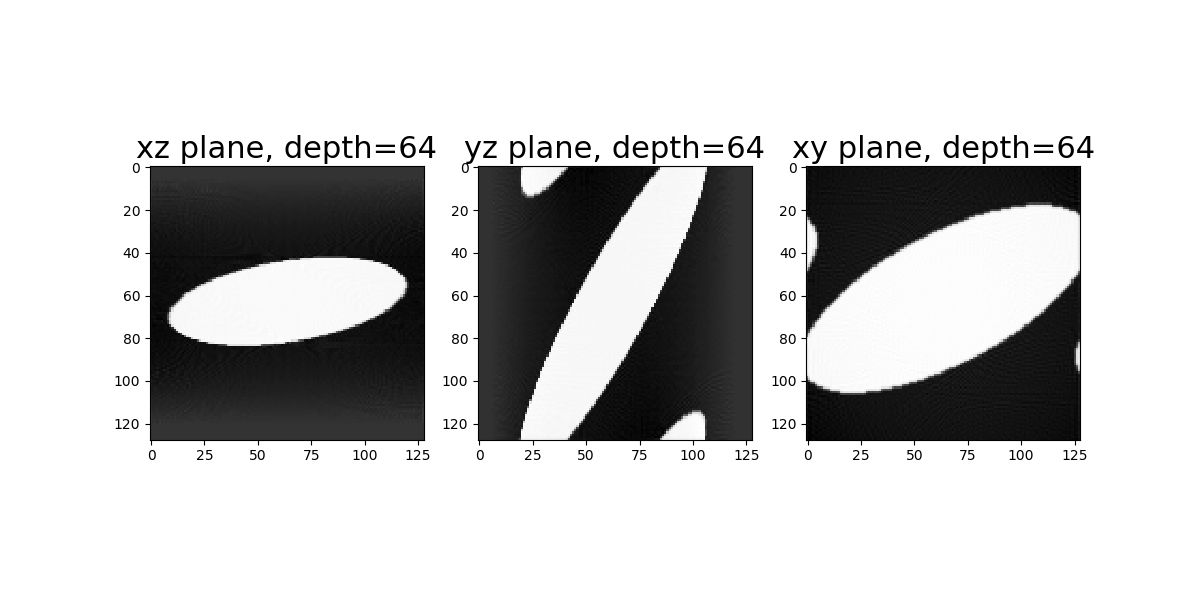

In [2]:
%matplotlib notebook
from fbp import FBP
from fbp_3d import FBP3D
from slider import *

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))
FBP3D.plot(sng3d, thetas, 'xz', ax1, depthxz, title='xz plane, depth=' + str(depthxz))
FBP3D.plot(sng3d, thetas, 'yz', ax2, depthyz, title='yz plane, depth=' + str(depthyz))
FBP3D.plot(sng3d, thetas, 'xy', ax3, depthxy, title='xy plane, depth=' + str(depthxy))

## yz plane view

In [3]:
fbps = FBP3D.compute(sng3d, thetas)
cube_show_slider(fbps, 2)

<IPython.core.display.Javascript object>

C:\Users\Elie\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


## xz plane view

In [4]:
fbps = FBP3D.compute(sng3d, thetas)
cube_show_slider(fbps, 1)

<IPython.core.display.Javascript object>

/usr/local/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<IPython.core.display.Javascript object>


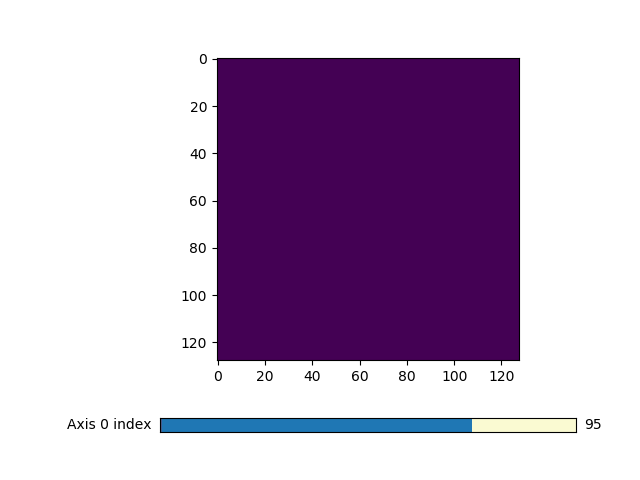

/usr/local/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [19]:
fbps = FBP3D.compute(sng3d, thetas)
cube_show_slider(fbps, 0)